In [3]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import math
import matplotlib.pyplot as plt
import yfinance as yf
import riskfolio.Portfolio as pf 

#Telechargement des donnees a partir de yahoo
yf.pdr_override()



In [4]:
#Collecte de donnees
actifs = ['XQQ.TO', 'RBOT.TO', 'XEG.TO', 'XST.TO', 'XUSR.TO', 'XCSR.TO', 'XDSR.TO', 'XRE.TO'] # XIT.TO RETIRÉ 10/01/2022, ESG all around GGRO.TO (includes fixed income) 'XUS.TO'
actifs.sort()

#Dates
import datetime 
today = datetime.datetime.today()
yesterday = today - datetime.timedelta(days = 1)
tomorrow = today + datetime.timedelta(days = 1) 
tomorrow = tomorrow.strftime("%Y-%m-%d")

debut = '2016-01-01' #Creation de raccourçis
fin = tomorrow


In [5]:
#Téléchargement des données
donnees = yf.download(actifs, start = debut, end = fin)
donnees = donnees.loc[:,('Adj Close', slice(None))]
donnees.columns = actifs

display(donnees)

[*********************100%***********************]  8 of 8 completed


,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
Date,,,,,,,,
2016-01-04,NaN,NaN,NaN,8.899272,36.942867,11.096334,46.546570,NaN
2016-01-05,NaN,NaN,NaN,8.960345,37.305256,11.034855,46.430508,NaN
2016-01-06,NaN,NaN,NaN,8.620081,36.842201,10.996434,46.885124,NaN
2016-01-07,NaN,NaN,NaN,8.262363,35.835598,10.712115,46.594948,NaN
2016-01-08,NaN,NaN,NaN,8.279815,35.432941,10.727482,46.701347,NaN
...,...,...,...,...,...,...,...,...
2022-01-12,34.439999,66.230003,53.709999,12.040000,124.330002,20.440001,76.570000,61.349998
2022-01-13,33.549999,66.029999,53.389999,11.960000,121.250000,20.520000,76.250000,60.209999
2022-01-14,32.770000,66.169998,53.240002,12.300000,121.989998,20.320000,75.559998,60.430000


In [6]:
# création de fichiers csv et excel 
donnees.to_csv(r'C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\ETF Monitoring\Prix_monitoring.csv')#, sep=';', decimal=",") # Options utiles aux besoins 
#donnees.to_csv(r"C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\data.csv")#, sep=';', decimal=",") # Options utiles aux besoins 
donnees.to_excel(r'C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\ETF Monitoring\Prix_monitoring.xlsx', sheet_name='Prix_ajuste')

In [7]:
#Création de raccoucis pour le code
fichier_excel = r'C:\Users\nickg\OneDrive - Université Laval\Gestion de portefeuille\python\ETF Monitoring\Prix_monitoring.xlsx' #Changer lendroit du fichier. Simplifie puisque nous n'avons pas retrouver la direction du fichier à chaque fois que nous voulons lui faire référence
nom_feuille = 'Prix_ajuste' #Pareillement^^
Colonne_optionnelle = 'Date' #Colonne que nous ne voulons pas tout le temps utiliser et qui peut changer selon le téléchargement du fichier. Par exemple, Date ou Dates.


In [8]:
#Importation des prix
Donnees = pd.read_excel(fichier_excel, sheet_name=nom_feuille, index_col=Colonne_optionnelle)
display(Donnees)

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
Date,,,,,,,,
2016-01-04,NaN,NaN,NaN,8.899272,36.942867,11.096334,46.546570,NaN
2016-01-05,NaN,NaN,NaN,8.960345,37.305256,11.034855,46.430508,NaN
2016-01-06,NaN,NaN,NaN,8.620081,36.842201,10.996434,46.885124,NaN
2016-01-07,NaN,NaN,NaN,8.262363,35.835598,10.712115,46.594948,NaN
2016-01-08,NaN,NaN,NaN,8.279815,35.432941,10.727482,46.701347,NaN
...,...,...,...,...,...,...,...,...
2022-01-12,34.439999,66.230003,53.709999,12.040000,124.330002,20.440001,76.570000,61.349998
2022-01-13,33.549999,66.029999,53.389999,11.960000,121.250000,20.520000,76.250000,60.209999
2022-01-14,32.770000,66.169998,53.240002,12.300000,121.989998,20.320000,75.559998,60.430000


In [9]:
#Création d'une liste des actifs sans la 'Dates', sera utile plus tard pour la pondération
liste_actifs = pd.read_excel(fichier_excel, sheet_name=nom_feuille) #ce que nous voulons importer du fichier excel
Actifs = [] #Liste avec 'Dates'
for i in liste_actifs: #Création de la boucle qui permet d'enregistrer les colonnes
	Actifs.append(i)
	
Actifs.remove(Colonne_optionnelle) #Nous enlevons 'Dates'
display(Actifs) #Affiche la liste
display(len(Actifs))

['RBOT.TO',
 'XCSR.TO',
 'XDSR.TO',
 'XEG.TO',
 'XQQ.TO',
 'XRE.TO',
 'XST.TO',
 'XUSR.TO']

8

In [10]:
#Calcul des rendements

R = donnees.pct_change().dropna()
display(R)

#Méthode alternative
#R_Actifs = (Donnees/Donnees.shift(1))-1
#display(R_Actifs*100)

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
Date,,,,,,,,
2020-05-06,-0.002868,0.006088,0.000000,-0.027254,0.006651,-0.004144,0.002116,0.004078
2020-05-07,-0.009108,0.001164,0.005926,0.019397,0.012510,0.004161,-0.008770,0.005256
2020-05-08,0.049347,-0.000930,0.008837,0.027484,0.013189,0.015193,0.015075,0.010456
2020-05-11,0.014292,0.009772,0.002920,-0.008230,0.009044,-0.010884,0.029863,0.013405
2020-05-12,-0.019091,-0.011751,0.004124,0.012448,-0.019690,-0.034388,-0.013793,0.000000
...,...,...,...,...,...,...,...,...
2022-01-12,0.008492,0.005924,0.003550,0.015177,0.003795,-0.001465,0.006573,-0.002763
2022-01-13,-0.025842,-0.003020,-0.005958,-0.006645,-0.024773,0.003914,-0.004179,-0.018582
2022-01-14,-0.023249,0.002120,-0.002809,0.028428,0.006103,-0.009747,-0.009049,0.003654


In [11]:
#Suppression des termes 'NaN' pour Donnees
#Méthode alternative
Donnees_nan = Donnees.dropna()
display(Donnees_nan)

#Méthode alternative
#Suppression des termes 'NaN'
#R = R_Actifs.dropna()
#display(R*100) #le "*100" n'affecte pas la variable, il est seulement présent pour la visualisation

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
Date,,,,,,,,
2020-05-05,20.876257,42.169147,39.863049,4.571514,72.880196,13.808421,61.400185,42.311840
2020-05-06,20.816383,42.425854,39.863049,4.446923,73.364891,13.751204,61.530098,42.484383
2020-05-07,20.626780,42.475224,40.099277,4.533179,74.282722,13.808421,60.990452,42.707661
2020-05-08,21.644648,42.435730,40.453617,4.657769,75.262444,14.018219,61.909855,43.154228
2020-05-11,21.953999,42.850414,40.571728,4.619434,75.943085,13.865640,63.758659,43.732731
...,...,...,...,...,...,...,...,...
2022-01-12,34.439999,66.230003,53.709999,12.040000,124.330002,20.440001,76.570000,61.349998
2022-01-13,33.549999,66.029999,53.389999,11.960000,121.250000,20.520000,76.250000,60.209999
2022-01-14,32.770000,66.169998,53.240002,12.300000,121.989998,20.320000,75.559998,60.430000


In [12]:
#Les rendements des différents actifs
display(R.mean()*100)

RBOT.TO    0.108178
XCSR.TO    0.108157
XDSR.TO    0.066925
XEG.TO     0.264685
XQQ.TO     0.124797
XRE.TO     0.097523
XST.TO     0.050610
XUSR.TO    0.082529
dtype: float64

In [13]:
#Calcul des rendements annualisé des différents actifs
R_Actifs_annualise = R.mean()*252
display(R_Actifs_annualise*100)

RBOT.TO    27.260828
XCSR.TO    27.255627
XDSR.TO    16.864983
XEG.TO     66.700728
XQQ.TO     31.448806
XRE.TO     24.575741
XST.TO     12.753720
XUSR.TO    20.797241
dtype: float64

In [14]:
#Calcul des écarts-types annualisé des différents actifs
Stdev_Actifs_annualise = R.std() * math.sqrt(252)
display(Stdev_Actifs_annualise*100)

RBOT.TO    21.532673
XCSR.TO    12.034821
XDSR.TO    13.602773
XEG.TO     38.874352
XQQ.TO     21.815968
XRE.TO     16.579675
XST.TO     14.131144
XUSR.TO    14.990541
dtype: float64

In [15]:
 #Attribution des poids
    #Méthode 2, utile si ptf équipondérée

#Actifs_1.remove('^GSPC')
Equi_poids = np.array([1/len(Actifs)]*len(Actifs))
display(Equi_poids)
display(sum(Equi_poids))


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

1.0

In [16]:
#Calcul matriciel du rendement journalier annualisé du Ptf
np.dot(Equi_poids.transpose(), R_Actifs_annualise) #1xn * nx1 (ligne x colonne)

R_ptf_annualise = str(np.dot(Equi_poids.transpose(), R_Actifs_annualise)*100)+ ' %'
display(R_ptf_annualise)

'28.457209306257663 %'

In [17]:
#Calcul matriciel de l'écart-type journalier annualisé du Ptf

    #Étape 1) Calculer la matrice de covariance journaliere
cov_matrix_ptf = R.cov()
display(cov_matrix_ptf)


,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
RBOT.TO,0.000184,0.000063,0.000062,0.000116,0.000121,0.000054,0.000026,0.000066
XCSR.TO,0.000063,0.000057,0.000031,0.000069,0.000061,0.000042,0.000025,0.000042
XDSR.TO,0.000062,0.000031,0.000073,0.000053,0.000044,0.000029,0.000015,0.000044
XEG.TO,0.000116,0.000069,0.000053,0.000600,0.000071,0.000114,0.000006,0.000040
XQQ.TO,0.000121,0.000061,0.000044,0.000071,0.000189,0.000048,0.000038,0.000088
XRE.TO,0.000054,0.000042,0.000029,0.000114,0.000048,0.000109,0.000018,0.000037
XST.TO,0.000026,0.000025,0.000015,0.000006,0.000038,0.000018,0.000079,0.000025
XUSR.TO,0.000066,0.000042,0.000044,0.000040,0.000088,0.000037,0.000025,0.000089


In [18]:
#Calcul matriciel de l'écart-type journalier annualisé du Ptf

    #Étape 2) Calcule matriciel de la variance du ptf
    #1xn * nxn * nx1
VAR_ptf_annualise = np.dot(Equi_poids.transpose(), np.dot(cov_matrix_ptf* 252, Equi_poids))
display(VAR_ptf_annualise)

0.01683945702514844

In [19]:
#Calcul matriciel de l'écart-type journalier annualisé du Ptf

    #Étape 3) Transformation de la variance du ptf en écart-type
Stdev_ptf_annualise = math.sqrt(VAR_ptf_annualise)

display(Stdev_ptf_annualise*100)

12.976693348133198

<AxesSubplot:xlabel='Date'>

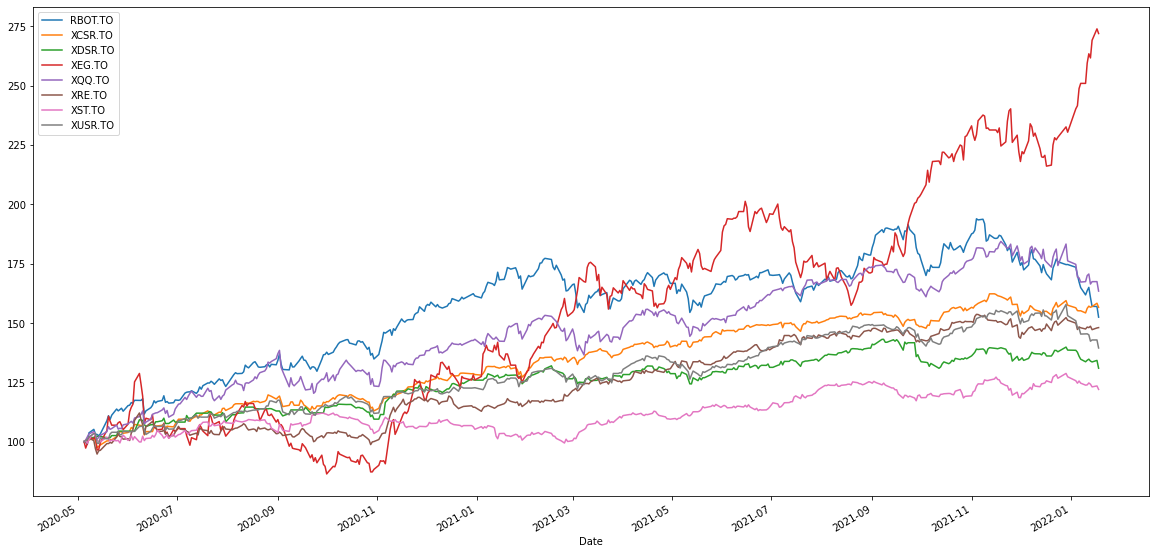

In [20]:
#Voir l'évolution des prix dans le temps 

(Donnees_nan / Donnees_nan.iloc[0]*100).plot(figsize=(20, 10))

In [21]:
#Calcul de la matrice de corrélation
corr_matrix_ptf = R.corr()
display(corr_matrix_ptf)

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
RBOT.TO,1.000000,0.607945,0.529124,0.350404,0.650087,0.379294,0.216828,0.517132
XCSR.TO,0.607945,1.000000,0.469951,0.369539,0.587275,0.524800,0.376631,0.585840
XDSR.TO,0.529124,0.469951,1.000000,0.253405,0.376821,0.326456,0.194269,0.537777
XEG.TO,0.350404,0.369539,0.253405,1.000000,0.211614,0.446770,0.027977,0.174502
XQQ.TO,0.650087,0.587275,0.376821,0.211614,1.000000,0.334948,0.307306,0.681298
XRE.TO,0.379294,0.524800,0.326456,0.446770,0.334948,1.000000,0.189443,0.374009
XST.TO,0.216828,0.376631,0.194269,0.027977,0.307306,0.189443,1.000000,0.300580
XUSR.TO,0.517132,0.585840,0.537777,0.174502,0.681298,0.374009,0.300580,1.000000


In [22]:
#Calculer les différents quantiles des actifs
R.quantile([.1, .25, .5, .75], axis = 0)

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
0.10,-0.015814,-0.007031,-0.008544,-0.024762,-0.016424,-0.010271,-0.009864,-0.010853
0.25,-0.006585,-0.002862,-0.001975,-0.011339,-0.005252,-0.004778,-0.004879,-0.003182
0.50,0.001570,0.001099,0.000000,0.001887,0.002668,0.000835,0.000149,0.000458
0.75,0.009507,0.005627,0.004692,0.016498,0.009475,0.006072,0.005521,0.005909


In [23]:
# CAPM, Alphas et Betas 
import statsmodels.api as sm

#Choix du taux sans risque et calcul de l'exces de rendement
rf = 1.26/100/252 #Attention à la périodicité
Exces = (R-rf) #soustraction du taux sans-risque à chaque données
display(Exces*100)


,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
Date,,,,,,,,
2020-05-06,-0.291802,0.603754,-0.005000,-2.730385,0.660058,-0.419361,0.206585,0.402788
2020-05-07,-0.915839,0.111367,0.587601,1.934690,1.246050,0.411085,-0.882044,0.520553
2020-05-08,4.929692,-0.097980,0.878656,2.743400,1.313908,1.514347,1.502454,1.040638
2020-05-11,1.424226,0.972206,0.286966,-0.828040,0.899357,-1.093436,2.981285,1.335547
2020-05-12,-1.914095,-1.180120,0.407415,1.239811,-1.974045,-3.443792,-1.384321,-0.005000
...,...,...,...,...,...,...,...,...
2022-01-12,0.844186,0.587356,0.350005,1.512709,0.374462,-0.151550,0.652289,-0.281336
2022-01-13,-2.589203,-0.306985,-0.600792,-0.669451,-2.482280,0.386389,-0.422918,-1.863190
2022-01-14,-2.329885,0.207024,-0.285947,2.837811,0.605308,-0.979663,-0.909921,0.360390


In [24]:
Moyenne_exces = Exces.mean()
display(Moyenne_exces*100)

RBOT.TO    0.103178
XCSR.TO    0.103157
XDSR.TO    0.061925
XEG.TO     0.259685
XQQ.TO     0.119797
XRE.TO     0.092523
XST.TO     0.045610
XUSR.TO    0.077529
dtype: float64

In [25]:
#Calcul des variances journalieres des différents actifs
Var_Actifs_journalier= Exces.var()
display(Var_Actifs_journalier)

RBOT.TO    0.000184
XCSR.TO    0.000057
XDSR.TO    0.000073
XEG.TO     0.000600
XQQ.TO     0.000189
XRE.TO     0.000109
XST.TO     0.000079
XUSR.TO    0.000089
dtype: float64

In [26]:
#Calcul des betas
betas = Exces.cov()/Var_Actifs_journalier
display(betas) #Par exemple, ici, l'axe des x correspond au choix de l'indice du marche

,RBOT.TO,XCSR.TO,XDSR.TO,XEG.TO,XQQ.TO,XRE.TO,XST.TO,XUSR.TO
RBOT.TO,1.000000,1.087734,0.837583,0.194090,0.641646,0.492604,0.330396,0.742818
XCSR.TO,0.339786,1.000000,0.415781,0.114403,0.323971,0.380941,0.320759,0.470329
XDSR.TO,0.334262,0.531178,1.000000,0.088670,0.234957,0.267840,0.187005,0.487991
XEG.TO,0.632608,1.193667,0.724187,1.000000,0.377080,1.047540,0.076964,0.452528
XQQ.TO,0.658640,1.064575,0.604341,0.118756,1.000000,0.440733,0.474426,0.991503
XRE.TO,0.292048,0.722987,0.397899,0.190545,0.254553,1.000000,0.222268,0.413657
XST.TO,0.142296,0.442236,0.201815,0.010170,0.199055,0.161466,1.000000,0.283348
XUSR.TO,0.360015,0.729721,0.592641,0.067290,0.468144,0.338161,0.318860,1.000000


In [27]:
#definissions des betas
indice_marche = '^GSPC'
betas_im = betas[indice_marche]
display(betas_im)

KeyError: '^GSPC'

In [ ]:
#Alpha                                          #0.016079
Alpha = Moyenne_exces-(betas_im*Moyenne_exces[indice_marche])
display(Alpha)

RBOT.TO    2.159675e-04
XCSR.TO    4.365361e-04
XDSR.TO    2.613950e-04
XEG.TO     1.066719e-03
XEQT.TO    9.598507e-05
XQQ.TO     8.001606e-06
XRE.TO     2.903541e-04
XST.TO     2.176859e-04
XUSR.TO    2.351083e-04
^GSPC      6.505213e-19
dtype: float64

In [ ]:
#Alternativement
import statsmodels.api as sm

#Définissions des variables X et Y
X = Exces[indice_marche]
y = Exces['XCSR.TO']

#Ajout de la constante à la variable X
X1 = sm.add_constant(X)

#Création du model de regression 
model = sm.OLS(y, X1)

#Affichage
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                XCSR.TO   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     314.3
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           3.50e-53
Time:                        11:23:05   Log-Likelihood:                 1621.7
No. Observations:                 432   AIC:                            -3239.
Df Residuals:                     430   BIC:                            -3231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.587      0.1

C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Automatisation du processus
#Création d'une liste
Actifs = [] #Liste avec 'TSX_Comp'
for i in Donnees: #Création de la boucle qui permet d'enregistrer les colonnes
	Actifs.append(i)
	
Actifs.remove(indice_marche) #Nous enlevons 'TSX_Comp'
display(Actifs) #Affiche la liste

['RBOT.TO',
 'XCSR.TO',
 'XDSR.TO',
 'XEG.TO',
 'XEQT.TO',
 'XQQ.TO',
 'XRE.TO',
 'XST.TO',
 'XUSR.TO']

In [ ]:
#La logique est de venir grouper les étapes précédentes en une seule étape par substitution

#Nos variables
    #X = Exces[indice_marche]
    #y = Exces['CDiscretionary']
    #X1 = sm.add_constant(X)
    #model = sm.OLS(y, X1)
    #results = model.fit()
    #print(results.summary())

#X1 = sm.add_constant(Exces[indice_marche])

#model = sm.OLS(Exces['CDiscretionary'], sm.add_constant(Exces[indice_marche]))

#results = sm.OLS(Exces['CDiscretionary'], sm.add_constant(Exces[indice_marche])).fit()


print(((sm.OLS(Exces['XDSR.TO'], sm.add_constant(Exces[indice_marche]))).fit()).summary())

                            OLS Regression Results                            
Dep. Variable:                XDSR.TO   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     96.53
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.09e-20
Time:                        11:23:06   Log-Likelihood:                 1496.1
No. Observations:                 432   AIC:                            -2988.
Df Residuals:                     430   BIC:                            -2980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.710      0.4

C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Tentative 2
for a in Actifs:
   print((((sm.OLS(Exces[a], sm.add_constant(Exces[indice_marche]))).fit()).summary)()) #Il suffit d'ajouter un () à la suite de .summary

                            OLS Regression Results                            
Dep. Variable:                RBOT.TO   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     304.1
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           6.90e-52
Time:                        11:23:06   Log-Likelihood:                 1371.5
No. Observations:                 432   AIC:                            -2739.
Df Residuals:                     430   BIC:                            -2731.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.440      0.6

C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

                            OLS Regression Results                            
Dep. Variable:                 XQQ.TO   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     700.9
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           2.50e-92
Time:                        11:23:06   Log-Likelihood:                 1455.6
No. Observations:                 432   AIC:                            -2907.
Df Residuals:                     430   BIC:                            -2899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.002e-06      0.000      0.020      0.9

C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Sauvegarde sous des variables: CAPM_"Actifs"
CAPM = {}
for a in Actifs:
    #CAPM["CAPM_{0}".format(a)] = (((sm.OLS(Exces[a], sm.add_constant(Exces[indice_marche]))).fit()).summary)()
    CAPM["CAPM_{0}".format(a)] = (((sm.OLS(Exces[a], sm.add_constant(Exces[indice_marche]))).fit()))

C:\Users\nickg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Test
display(CAPM)

{'CAPM_RBOT.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23eefab4850>,
 'CAPM_XCSR.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23f147a1f10>,
 'CAPM_XDSR.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23eef22dd90>,
 'CAPM_XEG.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23eecaeff10>,
 'CAPM_XEQT.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23f14543be0>,
 'CAPM_XQQ.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23f147b8520>,
 'CAPM_XRE.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23f1458d490>,
 'CAPM_XST.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23f142774f0>,
 'CAPM_XUSR.TO': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x23f1470c640>}

In [ ]:
#Si nous voulons faire référence à un seul actif en particulier
#print(CAPM['Actifs'])
print((CAPM['CAPM_XCSR.TO']).summary())
display((CAPM['CAPM_XCSR.TO']).rsquared)

                            OLS Regression Results                            
Dep. Variable:                XCSR.TO   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     314.3
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           3.50e-53
Time:                        11:23:06   Log-Likelihood:                 1621.7
No. Observations:                 432   AIC:                            -3239.
Df Residuals:                     430   BIC:                            -3231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.587      0.1

0.4222529519787279